### Beispiel aus dem Local Search Artikel

In [101]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=120) 


In [87]:
'''
Die Firmen A, B, C sind mit 0, 1, 2 kodiert
Es sind 9 Patente 0-8 verfügbar
'''
firms = list(range(3))
patents = list(range(9))

data = {0:{0,1,2,4}, 1:{2,4}, 2:{0,2,3,4,5,6,7,8}}
    
N = len(firms)
V = len(patents)


Wir lassen im folgenden die Indizes i,j,k über die Liste der Firmen und den Index v über die Liste der Patente laufen.

In der NxV-Matrix a gibt der Koeffizient $a_{iv}$ an, ob Firma i auf das Patent v zugreift

In [76]:
a = np.zeros((N,V))
for i in firms:
    for v in patents:
        a[i,v] = 1 if v in data[i] else 0

a

array([[1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1.]])

In der NxN-Matrix *alpha* gibt der Koeffizent $\text{alpha}_{ij}$ an, z welchem Anteil Firma j die Patente nutzt, auf die Firma i zugreift.

In [90]:
alpha = np.zeros((N,N))
for i in firms:
    for j in firms:
        if i == j: 
            alpha[i,j] = 0
        else:
            alpha[i,j] = np.sum([a[i,v]*a[j,v] for v in patents])/np.sum([a[i,v] for v in patents])
alpha

array([[0.   , 0.5  , 0.75 ],
       [1.   , 0.   , 1.   ],
       [0.375, 0.25 , 0.   ]])

Beispiel: alpha[2,1] = 0.25, d.h Firma 1 greift auf 25% der Patente zu, auf die Firma 2 zugreift.


In [93]:
d = np.zeros((N,N))
for i in firms:
    for j in firms:
        summe = 0
        for k in firms:
            if k == i or k == j: continue
            summe += (alpha[i,k]-alpha[j,k])**2 + (alpha[k,i]-alpha[k,j])**2   
        d[i,j]=np.sqrt(summe)
d

array([[0.       , 0.2795085, 0.25     ],
       [0.2795085, 0.       , 0.6731456],
       [0.25     , 0.6731456, 0.       ]])

d ist die Abstandsmatrix
Der Abstand zwischen zwei Firmen i,j ist die Summe aller Unterschiede, mit denen i,j sich für die Patente anderer Firmen k interessieren und der Unterschiede, mit denen sich andere Firmen k für die Patente von i und j interessieren.

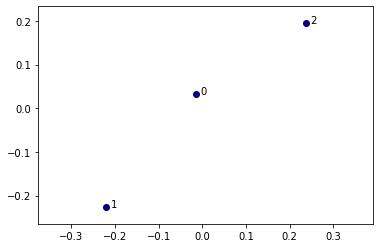

In [100]:
from sklearn.manifold import MDS
np.random.seed(2)
embedding = MDS(n_components=2,dissimilarity = 'precomputed')
m = embedding.fit_transform(d)
plt.axis('equal')
plt.scatter(m[:, 0], m[:, 1], color='navy') 
for i in firms:
    plt.annotate(i,(m[i,0]+0.01,m[i,1]))
 

### Vergleich zweier Datensätze

Firma 1 interessiert sich in der nächsten Zeiteinheit für drei weitere Bereiche interessiert: 5,6,7

In [106]:
data0 = {0:{0,1,2,4}, 1:{2,4}, 2:{0,2,3,4,5,6,7,8}}
data1 = {0:{0,1,2,4}, 1:{2,4,5}, 2:{0,2,3,4,5,6,7,8}}

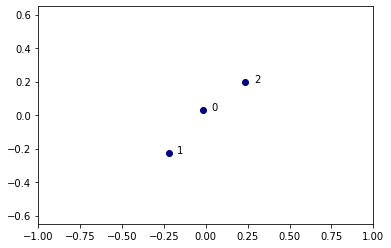

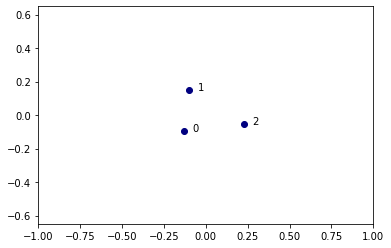

In [107]:
def getDistance(data):
    a = np.zeros((N,V))
    for i in firms:
        for v in patents:
            a[i,v] = 1 if v in data[i] else 0
            
    alpha = np.zeros((F,F))
    for i in firms:
        for j in firms:
            if i == j: 
                alpha[i,j] = 0
            else:
                alpha[i,j] = np.sum([a[i,v]*a[j,v] for v in patents])/np.sum([a[i,v] for v in patents])
    d = np.zeros((N,N))
    for i in firms:
        for j in firms:
            summe = 0
            for k in firms:
                if k == i or k == j: continue
                summe += (alpha[i,k]-alpha[j,k])**2 + (alpha[k,i]-alpha[k,j])**2   
            d[i,j]=np.sqrt(summe)
    return d

def plotDistance(d):
    np.random.seed(2)
    embedding = MDS(n_components=2,dissimilarity = 'precomputed')
    m = embedding.fit_transform(d)
    plt.axis('equal')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.scatter(m[:, 0], m[:, 1], color='navy') 
    for i in range(F):
        plt.annotate(i,(m[i,0]+0.05,m[i,1]))
    plt.show()
    
d0 = getDistance(data0)
d1 = getDistance(data1)

plotDistance(d0)
plotDistance(d1)
 
 

### Vergleich zwischen Zeiteinheiten

Die Elemente der Matrix dd zeigt die Differenz zwischen Firma i zum Zeitpunkt l zu Firma j zum Zeitpunkt m.
Für 2 Zeitpunkte 0 und 1 zeigt die Matrix b, wo die Werte in der 6x6 Matrix stehen.

In [108]:
b =  np.zeros((6,6),dtype=object)   
for k1 in range(6):
    for k2 in range(6):
        l = k1 // 3
        m = k2 // 3
        i = k1 % 3
        j = k2 % 3
        s = '{} {} {} {}'.format(str(i),str(j),str(l),str(m))
       
        b[k1,k2]= s
b

array([['0 0 0 0', '0 1 0 0', '0 2 0 0', '0 0 0 1', '0 1 0 1', '0 2 0 1'],
       ['1 0 0 0', '1 1 0 0', '1 2 0 0', '1 0 0 1', '1 1 0 1', '1 2 0 1'],
       ['2 0 0 0', '2 1 0 0', '2 2 0 0', '2 0 0 1', '2 1 0 1', '2 2 0 1'],
       ['0 0 1 0', '0 1 1 0', '0 2 1 0', '0 0 1 1', '0 1 1 1', '0 2 1 1'],
       ['1 0 1 0', '1 1 1 0', '1 2 1 0', '1 0 1 1', '1 1 1 1', '1 2 1 1'],
       ['2 0 1 0', '2 1 1 0', '2 2 1 0', '2 0 1 1', '2 1 1 1', '2 2 1 1']], dtype=object)

In [109]:
def getAlpha(data):
    a = np.zeros((N,V))
    for i in firms:
        for v in patents:
            a[i,v] = 1 if v in data[i] else 0
            
    alpha = np.zeros((F,F))
    for i in firms:
        for j in firms:
            if i == j: 
                alpha[i,j] = 0
            else:
                alpha[i,j] = np.sum([a[i,v]*a[j,v] for v in patents])/np.sum([a[i,v] for v in patents])
    return alpha

alpha0 = getAlpha(data0)
alpha1 = getAlpha(data1)

alphaA = np.zeros((2,3,3))
alphaA[0,:,:] = alpha0
alphaA[1,:,:] = alpha1
alphaA

array([[[0.        , 0.5       , 0.75      ],
        [1.        , 0.        , 1.        ],
        [0.375     , 0.25      , 0.        ]],

       [[0.        , 0.5       , 0.75      ],
        [0.66666667, 0.        , 1.        ],
        [0.375     , 0.375     , 0.        ]]])

In [110]:
dd = np.zeros((6,6))
for k1 in range(6):
    for k2 in range(6):
        l = k1 // 3
        m = k2 // 3
        i = k1 % 3
        j = k2 % 3
        faktor = 0.5 if (i == j and l != m) else 1
        tmp = 0
        for k in range(3):
            if k != i and k != j:
                s1 = (alphaA[l,i,k] - alphaA[m,j,k])**2
                s2 = (alphaA[l,k,i] - alphaA[m,k,j])**2
                tmp = tmp + s1 + s2
            
            
        dd[k1,k2] = faktor*np.sqrt(tmp)
dd       


array([[0.        , 0.2795085 , 0.25      , 0.16666667, 0.25      , 0.125     ],
       [0.2795085 , 0.        , 0.6731456 , 0.2795085 , 0.17800008, 0.6731456 ],
       [0.25      , 0.6731456 , 0.        , 0.41666667, 0.38414769, 0.0625    ],
       [0.16666667, 0.2795085 , 0.41666667, 0.        , 0.25      , 0.35600016],
       [0.25      , 0.17800008, 0.38414769, 0.25      , 0.        , 0.38414769],
       [0.125     , 0.6731456 , 0.0625    , 0.35600016, 0.38414769, 0.        ]])

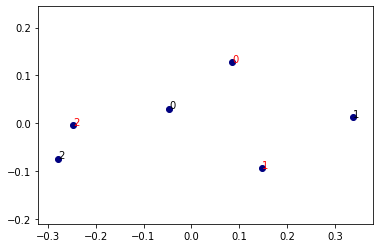

In [111]:
from sklearn.manifold import MDS
np.random.seed(42)
embedding = MDS(n_components=2, dissimilarity = 'precomputed')
m = embedding.fit_transform(dd)
plt.axis('equal')
plt.scatter(m[:, 0], m[:, 1], color='navy') 
for i in range(F):
    plt.annotate(i,(m[i,0],m[i,1]))
    plt.annotate(i,(m[i+3,0],m[i+3,1]),color='red')